<a href="https://colab.research.google.com/github/younghun-cha/DM_2022/blob/main/Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## t-test
- 두 집단의 평균을 비교하여, 평균의 차이가 통계적으로 의미가 있는지를 검정
- 귀무가설 : 집단 간의 평균 차이는 없다.
- 대립가설 : 집단 간의 평균 차이는 있다.

In [ ]:
# data --> https://archive.ics.uci.edu/ml/datasets/Wine+Quality

from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv
Saving winequality-red.csv to winequality-red.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

print(red_df.head())
print(red_df.shape)
print(white_df.head())
print(white_df.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# t-test로 red wine과 white wine의 quality 차이가 있는지 검정
from scipy import stats

stats.ttest_ind(red_df['quality'], white_df['quality'], equal_var=False)  # p-value가 굉장히 작기때문에 quality 차이가 있다고 볼 수 있음

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

## 분할표(Contingency table)
pandas의 crosstab 함수 사용

In [ ]:
import seaborn as sns
sns.set_style('white')

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.shape

(891, 15)

In [ ]:
pd.crosstab(index=titanic.survived, columns=titanic.who)

who,child,man,woman
survived,,,
0,34,449,66
1,49,88,205


In [ ]:
pd.crosstab(index=titanic.survived, columns=titanic.who, margins=True)

who,child,man,woman,All
survived,,,,
0,34,449,66,549
1,49,88,205,342
All,83,537,271,891


In [ ]:
pd.crosstab(index=titanic.survived, columns=titanic.who, normalize=True)

who,child,man,woman
survived,,,
0,0.038159,0.503928,0.074074
1,0.054994,0.098765,0.230079


In [ ]:
pd.crosstab(index=titanic['class'], columns=titanic.who, values=titanic.fare, aggfunc=np.mean)

who,child,man,woman
class,,,
First,139.382633,65.951086,104.317995
Second,28.323905,19.054124,20.868624
Third,23.220190,11.340213,15.354351


In [ ]:
pd.crosstab(titanic.survived, [titanic.pclass, titanic.who], normalize=True)

pclass           1                             2                      \
who          child       man     woman     child       man     woman   
survived                                                               
0         0.001122  0.086420  0.002245  0.000000  0.102132  0.006734   
1         0.005612  0.047138  0.099888  0.021324  0.008979  0.067340   

pclass           3                      
who          child       man     woman  
survived                                
0         0.037037  0.315376  0.065095  
1         0.028058  0.042649  0.062851

## 상관분석

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
print(titanic['embarked'].value_counts())
print(titanic['deck'].value_counts())
print(titanic['embark_town'].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


In [ ]:
titanic.age = titanic.age.fillna(titanic.age.median())
titanic.embarked = titanic.embarked.fillna('S')
titanic.deck = titanic.deck.fillna('C')
titanic.embark_town = titanic.embark_town.fillna('Southampton')
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
titanic_corr = titanic.corr(method = 'pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [ ]:
titanic.survived.corr(titanic.adult_male)

-0.5570800422053257

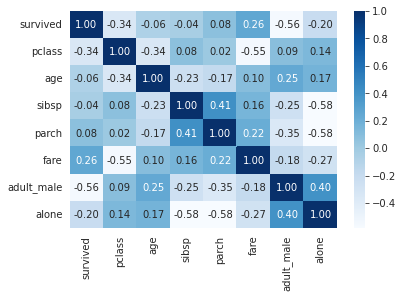

In [ ]:
sns.heatmap(data=titanic_corr, annot=True, fmt='.2f', cmap='Blues')